In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


In [4]:
# Load the dataset
data = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic[1].csv")

# Print the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [5]:
# Drop the target attribute for clustering tasks
data_for_clustering = data.drop('NObeyesdad', axis=1)

In [9]:
# Encode categorical columns if necessary
le = LabelEncoder()
categorical_cols = data_for_clustering.select_dtypes(include=['object']).columns
data_for_clustering[categorical_cols] = data_for_clustering[categorical_cols].apply(lambda col: le.fit_transform(col))


In [10]:
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

In [12]:
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

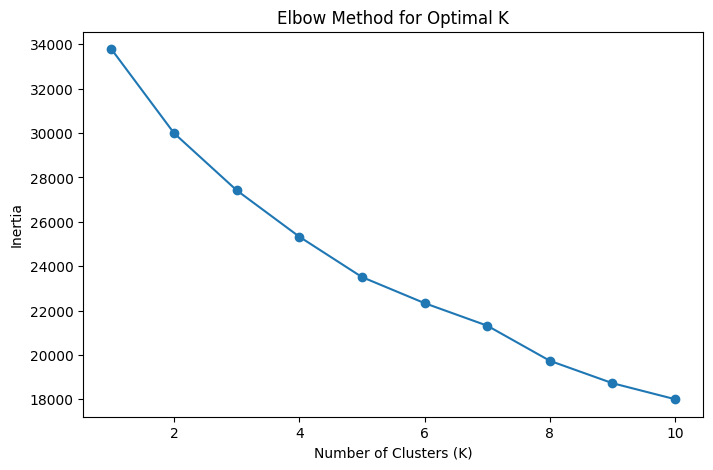

In [13]:
# Plot the Elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [14]:
optimal_k = 4  # Choose the K value where the inertia starts to decrease more slowly (elbow point)

# Apply K-Means with the optimal K
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = optimal_kmeans.fit_predict(data_for_clustering_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# Visualize different clusters using subplots (assuming PCA for dimensionality reduction)
pca = PCA(n_components=2)
data_for_clustering_pca = pca.fit_transform(data_for_clustering_scaled)

plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [18]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

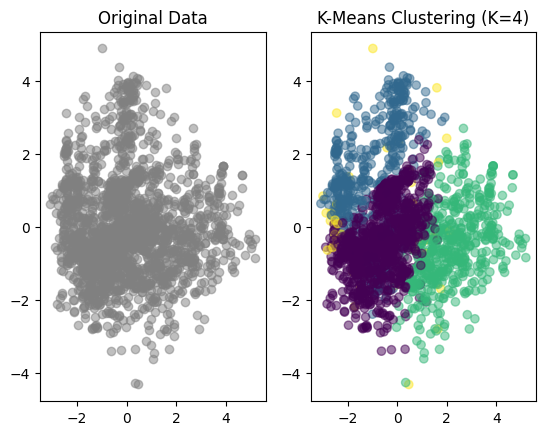

In [19]:
# Subplot 1: Original data
plt.subplot(1, 2, 1)
plt.scatter(data_for_clustering_pca[:, 0], data_for_clustering_pca[:, 1], c='gray', alpha=0.5)
plt.title('Original Data')

# Subplot 2: Clustered data
plt.subplot(1, 2, 2)
plt.scatter(data_for_clustering_pca[:, 0], data_for_clustering_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering (K={optimal_k})')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

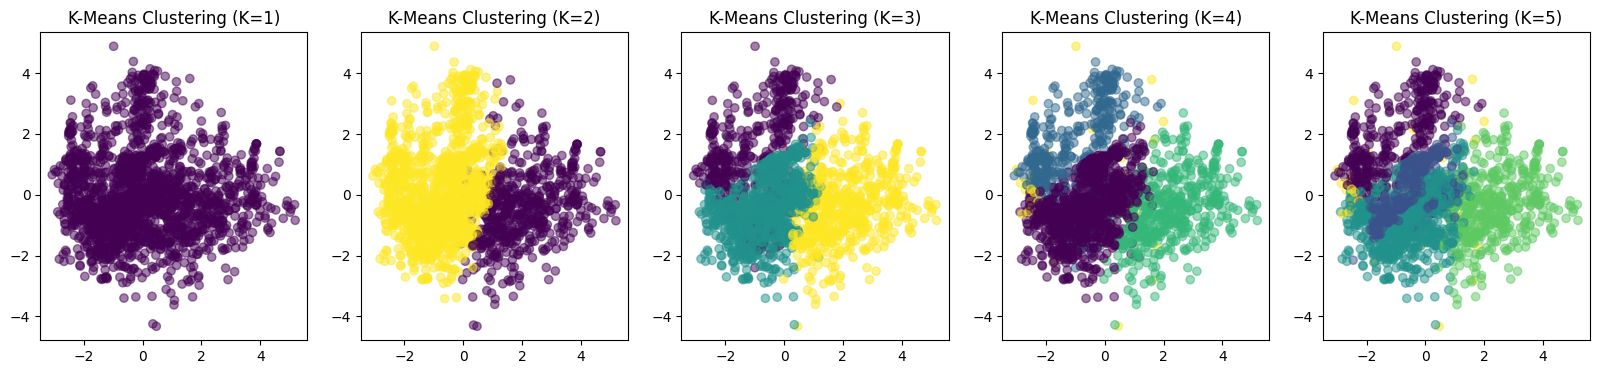

In [20]:
# Create subplots for each value of K from 1 to 5
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for k, ax in zip(range(1, 6), axes):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_for_clustering_scaled)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    data_for_clustering_pca = pca.fit_transform(data_for_clustering_scaled)

    ax.scatter(data_for_clustering_pca[:, 0], data_for_clustering_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    ax.set_title(f'K-Means Clustering (K={k})')

plt.show()